# Import Dependencies and Data

In [1]:
### Import Dependencies ###
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [2]:
### Load in Data File ###
data = pd.read_csv("../Resources/crypto_data.csv")
data.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


# Data Preparation

In [3]:
# Keep only is trading cryptocurrencies and then drop IsTrading column afterwards
# Drop Unnamed column
data = data.loc[data['IsTrading']==True]
data = data.drop(['IsTrading','Unnamed: 0'],axis=1)

In [4]:
# Remove all rows that have at least one null value
data = data.dropna()

In [5]:
# Filter for cryptocurrencies that have been mined (greater than zero)
data = data.loc[data['TotalCoinsMined']>0]

In [6]:
# Drop CoinName Column
data = data.drop(['CoinName'],axis=1)

In [7]:
# Create dummies for Algorithm and ProofType columns
data_dummies = pd.get_dummies(data[['Algorithm','ProofType']], drop_first=True)
data_noDummies = data.drop(['Algorithm','ProofType'],axis=1)
data = pd.concat([data_noDummies,data_dummies],axis=1)

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Dimensionality Reduction

In [9]:
# Initialize PCA model
pca = PCA(n_components=0.90)
pca_data = pca.fit_transform(scaled_data)

In [29]:
# Transform PCA data to a DataFrame
df_pca_data = pd.DataFrame(data=pca_data)
print('Original Data', data.shape)
print('PCA Data', df_pca_data.shape)

Original Data (532, 96)
PCA Data (532, 74)


##### Result of PCA Transformation: The number of columns reduced from 96 to 74 columns.

In [11]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [12]:
# Reduce dimensions
tsne_features = tsne.fit_transform(df_pca_data)

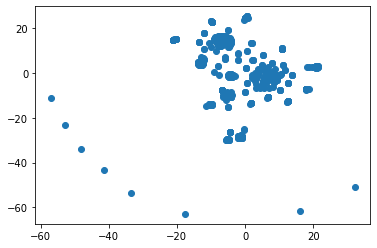

In [13]:
### Prepare dataset to plot
df_tsne = pd.DataFrame([])

# The first column of transformed features
df_tsne['x'] = tsne_features[:,0]

# The second column of transformed features
df_tsne['y'] = tsne_features[:,1]

# Visualize the clusters
plt.scatter(df_tsne['x'], df_tsne['y'])
plt.show()

# Cluster Analysis with k-Means

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


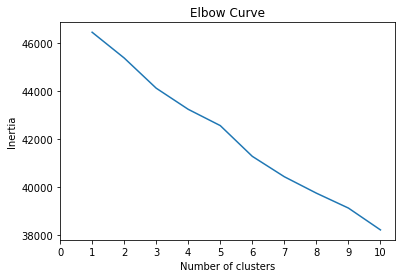

In [24]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca_data)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Conclusion
---
Based on the results of the elbow curve, the results for the optimal k remains inconclusive since the it is near a linear curve. Thus, the cryptocurrencies cannot be clustered together.